# Mod 2 Multiple Linear Regression Project Office Hours

- online-ds-ft-070620
- 08/25/20 - ...

# OVERVIEW OF OSEMiN

#### Resources

- **[OSEMN Data Science Workflow Notebook](https://github.com/jirvingphd/fsds-osemn-workflow)**
    - `student_OSEMN.ipynb`: also included in notes repo

> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Standardize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:2em;color:red;">
DELETE ABOVE THIS LINE FROM YOUR FINAL NOTEBOOK
</div>

# Multiple Regression Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [1]:
# !pip install -U fsds
from fsds.imports import *
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# Load in ames dataset
df = fs.datasets.load_ames_train(subset=False)
df.set_index('Id',inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# SCRUB

In [4]:
df.shape

(1460, 80)

In [5]:
cat_cols = df.select_dtypes('object').columns
df[cat_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


# EXPLORE

In [7]:
# pd.to_numeric()

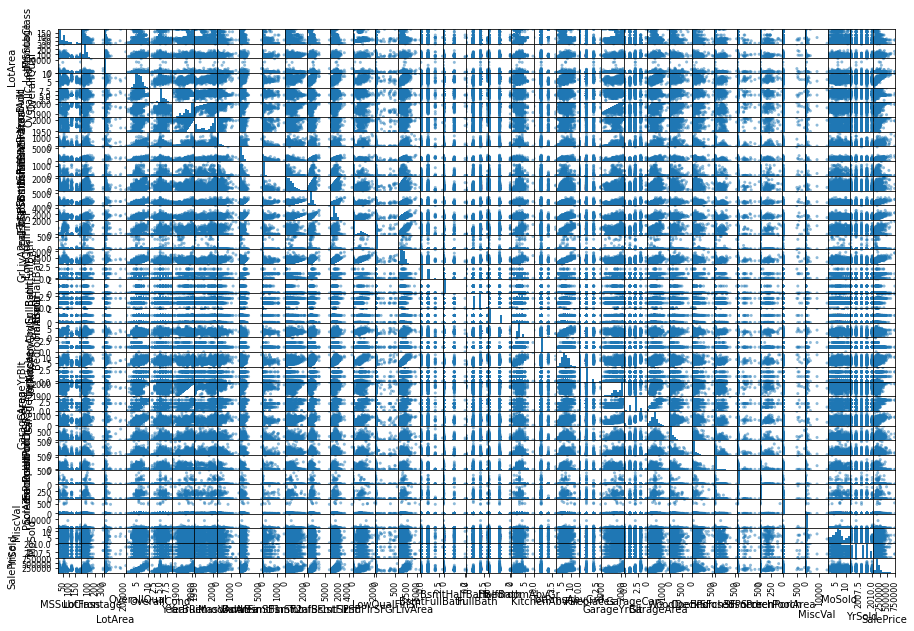

In [8]:
plt.rcParams['figure.figsize'] = (15,10)
pd.plotting.scatter_matrix(df);

<AxesSubplot:xlabel='SalePrice'>

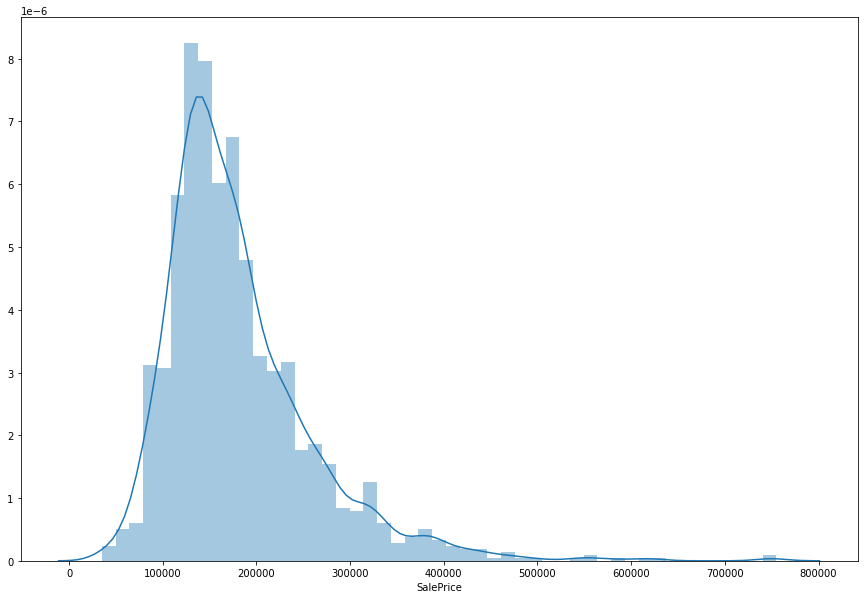

In [9]:
target= 'SalePrice'
sns.distplot(df[target])

In [10]:
num_cols = list(df.select_dtypes('number').columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

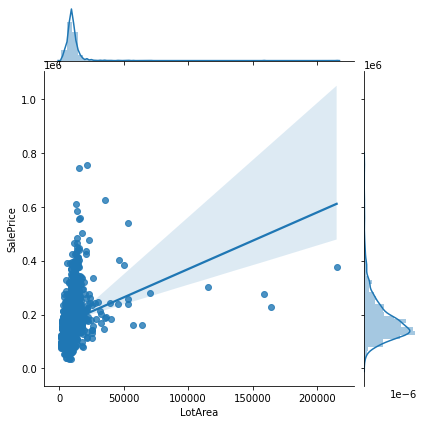

In [11]:
g = sns.jointplot(data=df,x='LotArea',y=target,kind='reg')
fig = g.fig
ax  = fig.get_axes()

In [12]:
# ax.set_title('Title')
# fig

<AxesSubplot:ylabel='SalePrice'>

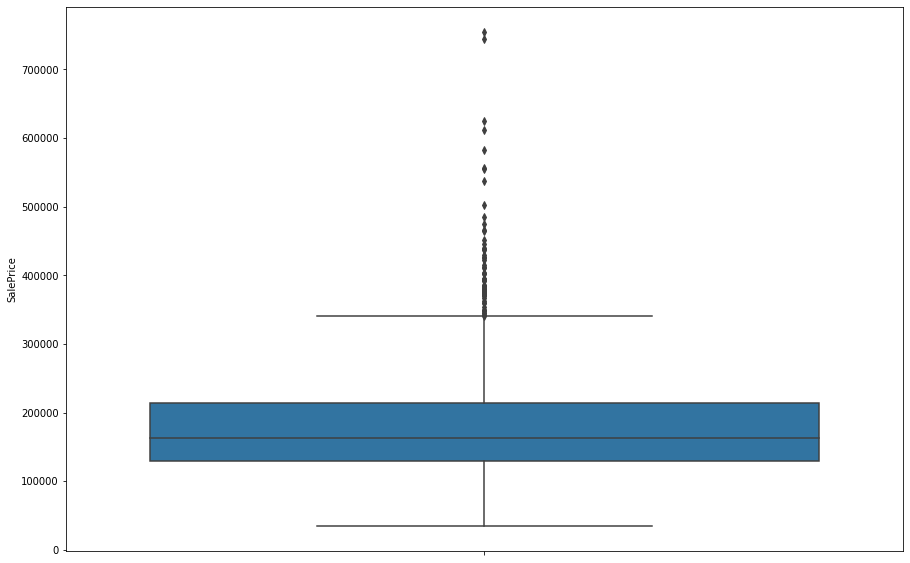

In [13]:
sns.boxplot(y=df[target])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

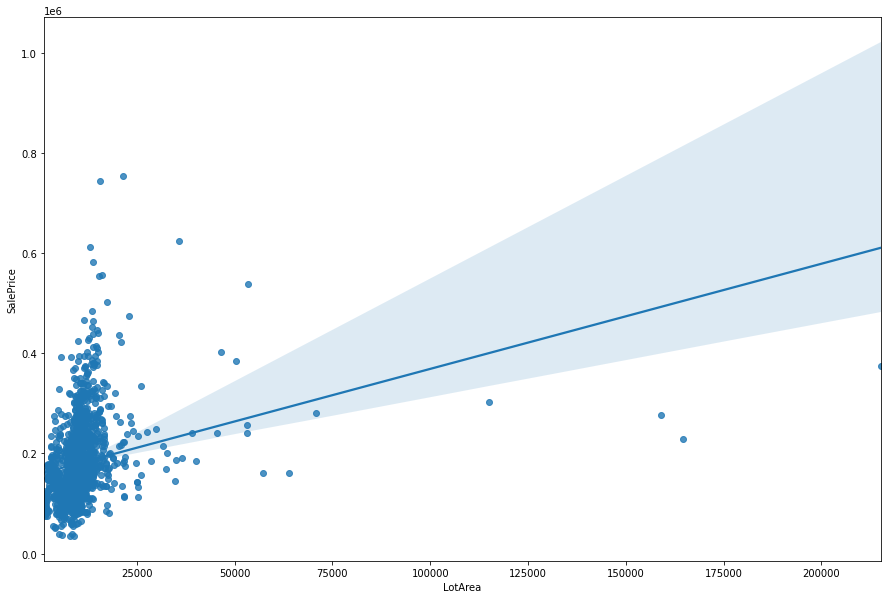

In [14]:
sns.regplot(data=df,x='LotArea',y=target)

In [15]:
def plot_col(df,col,target='SalePrice'):
    g = sns.jointplot(data=df,x=col,y=target,kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return g


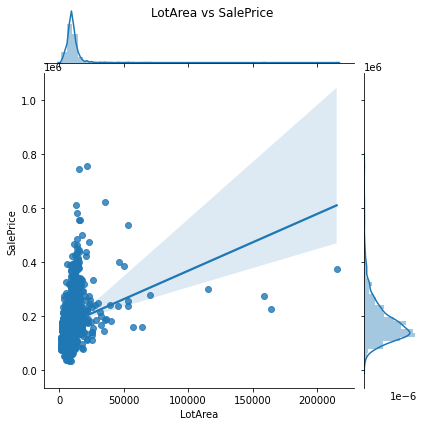

In [16]:
plot_col(df,'LotArea')

In [17]:
from ipywidgets import interact

In [18]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(df,col)

interactive(children=(Dropdown(description='col', options=('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQua…

- Condition: Category? 

# MODEL

In [19]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


In [20]:
drop_cols = only_nulls[only_nulls > .8].index
df.drop(columns=drop_cols,inplace=True)

In [21]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
LotFrontage,0.177397
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
FireplaceQu,0.472603


In [22]:
df['FireplaceQu'].value_counts(dropna=False,normalize=True)

NaN   0.473
Gd    0.260
TA    0.214
Fa    0.023
Ex    0.016
Po    0.014
Name: FireplaceQu, dtype: float64

In [23]:
df.drop(columns=['LotFrontage','FireplaceQu'],inplace=True)

In [24]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
GarageType,0.055479
GarageYrBlt,0.055479


<AxesSubplot:>

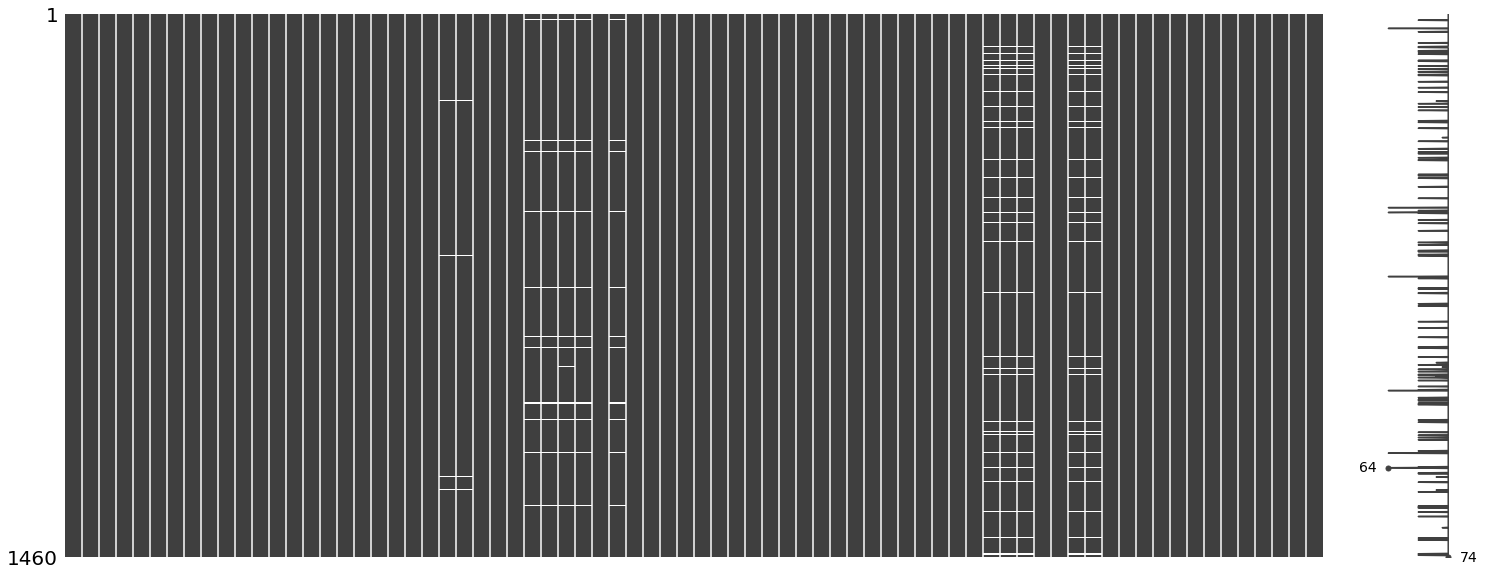

In [25]:
import missingno as ms
ms.matrix(df)

In [26]:
df.isna().sum(axis=1).value_counts()

0     1338
5      104
2        8
10       7
1        3
dtype: int64

In [27]:
null_cols = list(only_nulls.index)
null_cols

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [28]:
df[null_cols].nunique()

MasVnrType        4
MasVnrArea      327
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [29]:
null_modes = dict(df[null_cols].mode())
null_modes

{'MasVnrType': 0    None
 Name: MasVnrType, dtype: object,
 'MasVnrArea': 0   0.000
 Name: MasVnrArea, dtype: float64,
 'BsmtQual': 0    TA
 Name: BsmtQual, dtype: object,
 'BsmtCond': 0    TA
 Name: BsmtCond, dtype: object,
 'BsmtExposure': 0    No
 Name: BsmtExposure, dtype: object,
 'BsmtFinType1': 0    Unf
 Name: BsmtFinType1, dtype: object,
 'BsmtFinType2': 0    Unf
 Name: BsmtFinType2, dtype: object,
 'Electrical': 0    SBrkr
 Name: Electrical, dtype: object,
 'GarageType': 0    Attchd
 Name: GarageType, dtype: object,
 'GarageYrBlt': 0   2005.000
 Name: GarageYrBlt, dtype: float64,
 'GarageFinish': 0    Unf
 Name: GarageFinish, dtype: object,
 'GarageQual': 0    TA
 Name: GarageQual, dtype: object,
 'GarageCond': 0    TA
 Name: GarageCond, dtype: object}

In [30]:
for col,mode in null_modes.items():
    df[col] = df[col].fillna(mode[0])
nulls= df.isna().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [31]:
import re
def clean_colnames(df_,rename = {'1':'One', '2':'Two', '3':'Three'}):
    """Removes characters incomatible with statsmodels formula OLS """
    
    df = df_.copy()
    
    ## Use Regex to find numbers at start of name
    starts_number = list(map(lambda x: re.findall(r"(^\d)(\w*)",x),df.columns))#[:][:]
    
    # Save the column names and starts_number results
    col_df = pd.DataFrame({'column':df.columns,
                 'number_col':starts_number}).explode('number_col')

    ## Make df of only  non-nulls
    cols_to_rename = col_df[col_df['number_col'].notnull()]
    
    # Separate the starts_number results
    cols_to_rename['number'] = cols_to_rename['number_col'].map(lambda x: x[0])
    cols_to_rename['name'] = cols_to_rename['number_col'].map(lambda x: x[1])

    
    ## Renaming dict
#     rename = {'1':'One', '2':'Two', '3':'Three'}

    ## Save new names
    new_names = cols_to_rename['number'].map(rename) + cols_to_rename['name']
    
    ## Make dict for renaming
    rename_cols = dict(zip(cols_to_rename['column'],new_names))
    
    return df.rename(rename_cols,axis=1)

In [32]:
df = clean_colnames(df)

In [33]:
cat_cols =df.select_dtypes('O').columns
df_ohe = pd.get_dummies(df,columns=cat_cols)
df_ohe

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,OnestFlrSF,TwondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0.000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.000,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,20,13175,6,6,1978,1988,119.000,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.000,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,70,9042,7,9,1941,2006,0.000,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.000,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [34]:
def fix_ohe_colnames(df_ohe_):
    df_ohe = df_ohe_.copy()
    new_col_names = list(map(lambda x: x.replace('.','').replace(' ',''),df_ohe.columns))
    new_col_names = list(map(lambda x: x.replace('(','').replace(')',''),new_col_names))
    new_col_names= list(map(lambda x: x.replace('&',''),new_col_names))
    df_ohe.columns = new_col_names
    return df_ohe

## Baseline Model

In [35]:
df_ohe = fix_ohe_colnames(df_ohe)

In [36]:
df_ohe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,OnestFlrSF,TwondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_Call,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [37]:
target

'SalePrice'

In [38]:
features = '+'.join(df_ohe.drop(columns=target).columns)
features[:100]

'MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+B'

In [39]:
formula = target + '~'+features
formula

'SalePrice~MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+OnestFlrSF+TwondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+MSZoning_Call+MSZoning_FV+MSZoning_RH+MSZoning_RL+MSZoning_RM+Street_Grvl+Street_Pave+LotShape_IR1+LotShape_IR2+LotShape_IR3+LotShape_Reg+LandContour_Bnk+LandContour_HLS+LandContour_Low+LandContour_Lvl+Utilities_AllPub+Utilities_NoSeWa+LotConfig_Corner+LotConfig_CulDSac+LotConfig_FR2+LotConfig_FR3+LotConfig_Inside+LandSlope_Gtl+LandSlope_Mod+LandSlope_Sev+Neighborhood_Blmngtn+Neighborhood_Blueste+Neighborhood_BrDale+Neighborhood_BrkSide+Neighborhood_ClearCr+Neighborhood_CollgCr+Neighborhood_Crawfor+Neighborhood_Edwards+Neighborhood_Gilbert+Neighborhood_IDOTRR+Neighborhood_MeadowV+Neighborhood_M

In [40]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:57:18   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

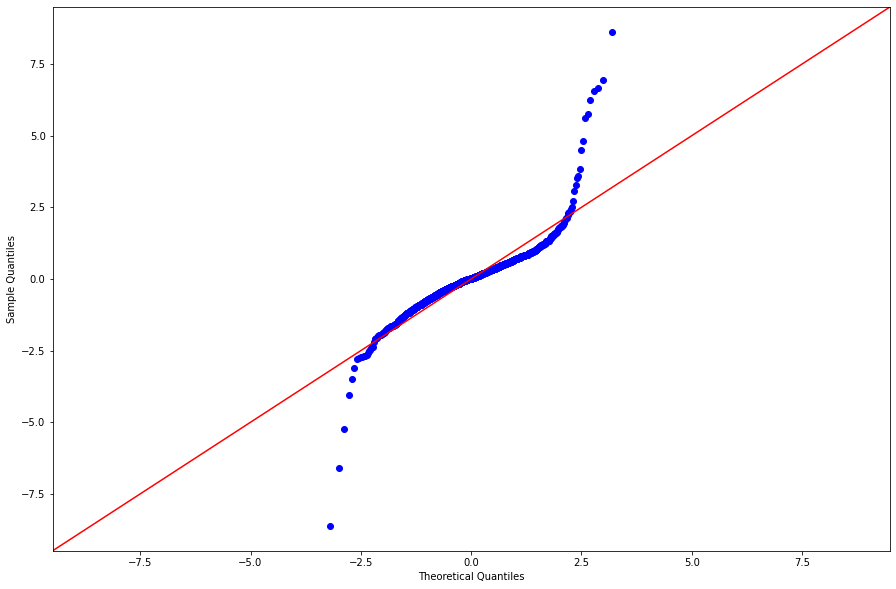

In [41]:
model = smf.ols(formula, df_ohe).fit()
display(model.summary())
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')

# 📅 08/26/20: Adding Proper Diagnostic and Modeling Functions

### def `make_model`

In [43]:
def make_model(df_ohe,target="SalePrice",drop_cols=[]):
    ## Remove Drop Cols
    df_ohe = fix_ohe_colnames(df_ohe)
    
    ## Remove Drop cols (if present)
    for col in drop_cols:
         if col in df_ohe.columns:
            df_ohe.drop(col,axis=1,inplace=True) 
            

    f = target + '~' +  ' + '.join(df_ohe.drop(target,axis=1).columns)
    model = model = smf.ols(f,df_ohe).fit()
    return model

### def `diagnose_model`

In [44]:
def diagnose_model(model,y_true=None,show_summary=True):
    from scipy import stats
    import statsmodels.api as sm
    ## SHow summary 
    if show_summary:
        display(model.summary())
    ## Get Model Residuals 
    resids = model.resid
    
    ## Create PLot
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    
    ## QQ PLOT
    sm.graphics.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    ax[0].set_title('QQ Plot of Model Residuals')
    
    
    ## RESIDUAL PLOT for Homoskedasticity
    
    ## Create xs for resid plot. Defaults to linspace for # of rows
    if y_true is None:
        xs = np.linspace(0,len(resids),len(resids))
        xlabel = 'Row in Dataset'
        font_dict = dict(rotation = 0)

    else:
        xs = y_true
        xlabel = 'True Target Values'
        x_rot = 0
        font_dict = dict(rotation = 45,ha='right')
    
    ## Plot residuals
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0,color='k',zorder=-1)

    ax[1].set(ylabel='Residuals',title='Homoskedasticity Check',
              xlabel=xlabel)
    
    
    ## Clean up plot
    plt.tight_layout()
    plt.show()
    
    
    ## Test model.resid normality
    res = stats.normaltest(resids)
#     print(res)
    sig = res[1] < .05
    sig_str = "ARE NOT" if sig else "ARE" 
    print(f"Residual Normality Test Results:")
    print('\t',res)

    print(f"\tp <.05? {sig}, therefore model residisuals {sig_str} normally distributed.")
    
#     return fig,ax 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:57:19   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

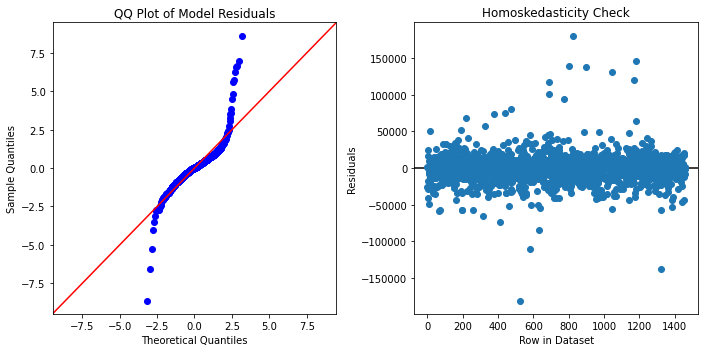

Residual Normality Test Results:
	 NormaltestResult(statistic=447.2197847296571, pvalue=7.717162530316525e-98)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [45]:
model = make_model(df_ohe)
diagnose_model(model)

## Baseline  Model - with Diagnostic Function

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:57:20   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

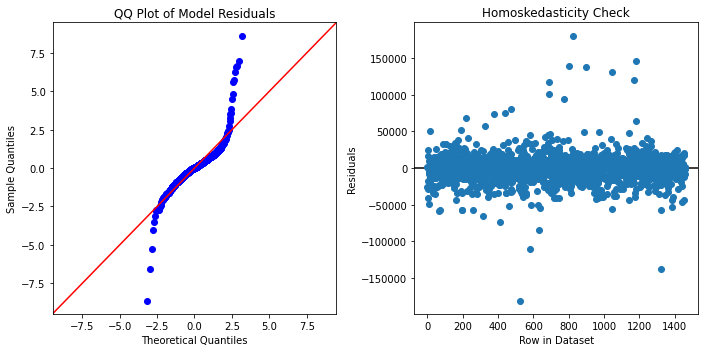

Residual Normality Test Results:
	 NormaltestResult(statistic=447.2197847296571, pvalue=7.717162530316525e-98)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


TypeError: 'NoneType' object is not iterable

In [46]:
model = make_model(df_ohe)
fig,ax = diagnose_model(model)

### Removing Features with High P-Values

In [ ]:
model.pvalues

In [ ]:
pvalues = model.pvalues.rename('p-values')
pvalues.sort_values(ascending=False)

In [ ]:
pvalues[ pvalues > .05]

In [ ]:
bad_pvals_coeffs = list(pvalues[ pvalues > .05].index)
bad_pvals_coeffs[:5]

In [ ]:
for coeff in ['const','Intercept']:
    if coeff in bad_pvals_coeffs:
        bad_pvals_coeffs.remove(coeff) 
bad_pvals_coeffs[:5]

In [ ]:
len(bad_pvals_coeffs) / len(df_ohe.columns)

In [ ]:
def get_bad_coeffs_list(model):
    pvalues = model.pvalues.rename('p-values')
    pvalues.sort_values(ascending=False,inplace=True)
    bad_pvals_coeffs = list(pvalues[ pvalues > .05].index)
    
    for coeff in ['const','Intercept']:
        if coeff in bad_pvals_coeffs:
            bad_pvals_coeffs.remove(coeff) 
    return bad_pvals_coeffs

In [ ]:
model= make_model(df_ohe,drop_cols=[])
diagnose_model(model)

In [ ]:
bad_coeffs = get_bad_coeffs_list(model)
bad_coeffs

### Final Baseline Model with Bad p-values removed

In [ ]:
model = make_model(df_ohe,drop_cols=bad_coeffs)
diagnose_model(model)

In [ ]:
bad_coeffs2 = get_bad_coeffs_list(model)
bad_coeffs2

In [ ]:
model = make_model(df_ohe,drop_cols=[*bad_coeffs,*bad_coeffs2])
diagnose_model(model)

# iNTERPRET

- Our Model has indications of multicollinearity issues that we have yet to address. 
- Additionally, we have yet to remove outliers, which may explain the tails of our QQ-Plot. 


- Will now remove outliers, address multicollinearity, and then produce second Model.

# Addressing Multicollinearity

## 📅 08/25/20 Office Hours

In [ ]:
corr = df.corr().abs()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx] = True

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap= 'Reds')

In [ ]:
def plot_correlation(corr,figsize=(25,25)):
    ## Get Correlation Matrix
    corr = np.abs(corr)
    
    ## Create Fig,Ax
    fig,ax = plt.subplots(figsize=figsize)
    
    ## Get Mask to cover upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask,k=0)] = True
    
    ## Make heatmap 
    sns.heatmap(corr,mask=mask,cmap=sns.diverging_palette(240, 10, n=10),
               annot=True,center=0,ax=ax,linewidths=1 
                ,square=True, cbar_kws={'shrink':0.6})
    return fig,ax

corr = df.corr()
plot_correlation(corr)

In [ ]:
corr['SalePrice'].sort_values()

### VIF


In [ ]:
X = df_ohe.drop('SalePrice',axis=1)
X = sm.add_constant(X)
X

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results.value_counts()

In [ ]:
vif_results=vif_results.loc[~(vif_results==np.inf)]

In [ ]:
vif_results.sort_values(ascending=False)

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.